In [2]:
import supervision as sv
from ultralytics import YOLOv10
import numpy as np
import cv2

In [9]:
model = YOLOv10(r'model\yolov10x_tuned.pt')

In [12]:
image = cv2.imread('output_images/50.png')


0: 384x640 5 bikes, 8 buss, 3 cars, 8 trucks, 1021.3ms
Speed: 2.0ms preprocess, 1021.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


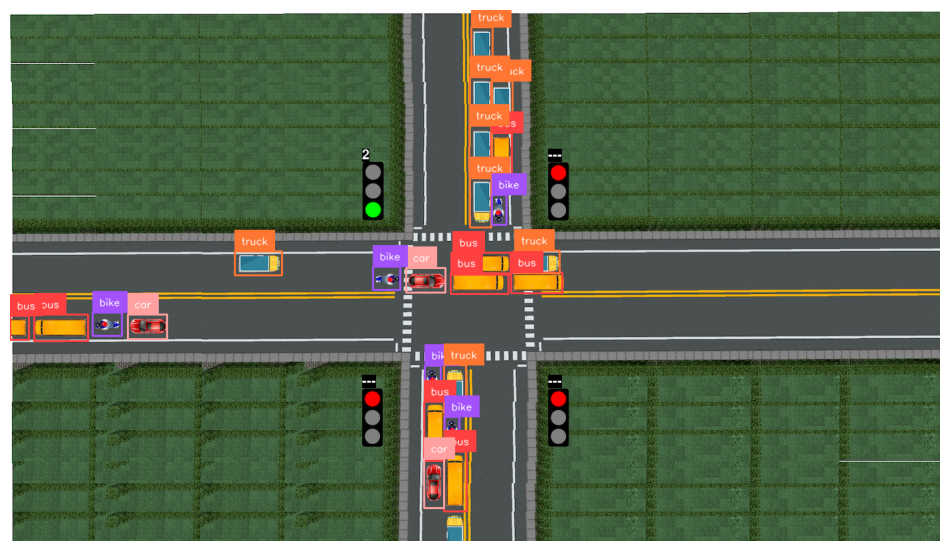

In [13]:
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
image = cv2.imread('output_images/46.png')

# print(model)

roi_left = [(0, 350), (606, 515)]
roi_right = [(790, 425), (1400, 510)]
roi_up = [(680, 0), (770, 345)]
roi_down = [(600, 515), (690, 800)]

mask1 = np.zeros(image.shape[:2], dtype=np.uint8)
mask2 = np.zeros(image.shape[:2], dtype=np.uint8)
mask3 = np.zeros(image.shape[:2], dtype=np.uint8)
mask4 = np.zeros(image.shape[:2], dtype=np.uint8)

cv2.rectangle(mask1, roi_left[0], roi_left[1], 255, -1)
cv2.rectangle(mask2, roi_right[0], roi_right[1], 255, -1)
cv2.rectangle(mask3, roi_up[0], roi_up[1], 255, -1)
cv2.rectangle(mask4, roi_down[0], roi_down[1], 255, -1)

img1 = cv2.bitwise_and(image, image, mask=mask1)
img2 = cv2.bitwise_and(image, image, mask=mask2)
img3 = cv2.bitwise_and(image, image, mask=mask3)
img4 = cv2.bitwise_and(image, image, mask=mask4)

results = model(img2)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# Get the class indices of detected objects
class_indices = results.boxes.cls

print(len(class_indices))


sv.plot_image(annotated_image)

In [15]:
import numpy as np

roi_left = [(0, 350), (606, 515)]
roi_right = [(790, 425), (1400, 510)]
roi_up = [(680, 0), (770, 345)]
roi_down = [(600, 515), (690, 800)]

mask1 = np.zeros(image.shape[:2], dtype=np.uint8)
mask2 = np.zeros(image.shape[:2], dtype=np.uint8)
mask3 = np.zeros(image.shape[:2], dtype=np.uint8)
mask4 = np.zeros(image.shape[:2], dtype=np.uint8)

cv2.rectangle(mask1, roi_left[0], roi_left[1], 255, -1)
cv2.rectangle(mask2, roi_right[0], roi_right[1], 255, -1)
cv2.rectangle(mask3, roi_up[0], roi_up[1], 255, -1)
cv2.rectangle(mask4, roi_down[0], roi_down[1], 255, -1)

img1 = cv2.bitwise_and(image, image, mask=mask1)
img2 = cv2.bitwise_and(image, image, mask=mask2)
img3 = cv2.bitwise_and(image, image, mask=mask3)
img4 = cv2.bitwise_and(image, image, mask=mask4)

cv2.imshow('img1', img1)
cv2.waitKey(0)
cv2.imshow('img2', img2)
cv2.waitKey(0)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.imshow('img4', img4)
cv2.waitKey(0)

In [3]:
import torch
torch.cuda.is_available()
torch.cuda.device_count()
torch.cuda.get_device_name()

'Quadro M2200'

In [1]:
pip show ultralytics

Name: ultralytics
Version: 8.1.34
Summary: Ultralytics YOLOv8 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: 
Author: Glenn Jocher, Ayush Chaurasia, Jing Qiu
Author-email: 
License: AGPL-3.0
Location: t:\Sus\TrafficLight\env\Lib\site-packages
Requires: matplotlib, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, thop, torch, torchvision, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.
